Uploading the Dataset

In [16]:
from google.colab import files

uploaded = files.upload()


Saving klapeye-global-terrorism.csv to klapeye-global-terrorism (1).csv


Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the CSV File

In [42]:
df = pd.read_csv('klapeye-global-terrorism.csv')
df.head()


,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
0,2023-04-02,Russia,NaN,Saint Petersburg,Eastern Europe,Europe,Darya Trepova,42.0,1.0,During a speech by military blogger Vladlen Ta...,"64.6863136,97.7453061",Explosion
1,2023-03-06,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"A terrorist attack occurred in Bolan, Balochis...","24.8546842,67.0207055",Explosion
2,2023-02-17,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,The 2023 Karachi Police Station Attack occurre...,"24.8546842,67.0207055",Assault
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Southern Asia,Asia,Jamaat-ul-Ahrar,220.0,101.0,A suicide attacker detonated a bomb during aft...,"34.0123846,71.5787458",Explosion
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Palestinian Islamic Jihad (PIJ),3.0,7.0,Seven people were shot and killed and at least...,"31.7788242,35.2257626",Assault


Checking for shape and info




In [43]:
print(df.shape)
print(df.info())

(27177, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27177 entries, 0 to 27176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         27177 non-null  object 
 1   COUNTRY      27177 non-null  object 
 2   STATE        15423 non-null  object 
 3   CITY         13151 non-null  object 
 4   SUBREGION    21182 non-null  object 
 5   REGION       21177 non-null  object 
 6   PERPETRATOR  10153 non-null  object 
 7   INJURED      27172 non-null  float64
 8   DEAD         27176 non-null  float64
 9   DESCRIPTION  27177 non-null  object 
 10  COORDINATES  27169 non-null  object 
 11  CATEGORY     21582 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.5+ MB
None


Checking null values

In [44]:
#Data preprocessing
df.isnull().sum()

,0
DATE,0
COUNTRY,0
STATE,11754
CITY,14026
SUBREGION,5995
REGION,6000
PERPETRATOR,17024
INJURED,5
DEAD,1
DESCRIPTION,0


In [45]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df.shape

df.drop('COORDINATES',axis=1,inplace=True)
df.head()


,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,CATEGORY,YEAR
0,2023-04-02,Russia,NaN,Saint Petersburg,Eastern Europe,Europe,Darya Trepova,42.0,1.0,During a speech by military blogger Vladlen Ta...,Explosion,2023
1,2023-03-06,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"A terrorist attack occurred in Bolan, Balochis...",Explosion,2023
2,2023-02-17,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,The 2023 Karachi Police Station Attack occurre...,Assault,2023
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Southern Asia,Asia,Jamaat-ul-Ahrar,220.0,101.0,A suicide attacker detonated a bomb during aft...,Explosion,2023
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Palestinian Islamic Jihad (PIJ),3.0,7.0,Seven people were shot and killed and at least...,Assault,2023


Filling the null values

In [47]:
# For null values in categorical columns

categorical_cols = ['STATE','REGION','PERPETRATOR','CITY','SUBREGION','CATEGORY']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


df.isnull().sum()

# for null values in numerical columns
df['DEAD'] = df['DEAD'].fillna(df['DEAD'].mean())
df['INJURED'] = df['INJURED'].fillna(df['INJURED'].mean())
df.isnull().sum()

/tmp/ipython-input-3659601972.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


,0
DATE,0
COUNTRY,0
STATE,0
CITY,0
SUBREGION,0
REGION,0
PERPETRATOR,0
INJURED,0
DEAD,0
DESCRIPTION,0


## Data Analysis

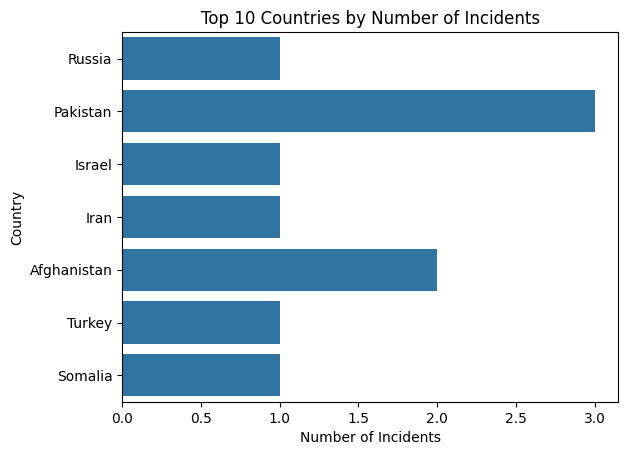

In [54]:
# Data Analysis
sns.countplot(df['COUNTRY'].head(10))
plt.title("Top 10 Countries by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
plt.show()

This graph shows that pakistan and afghanistan has the largest number of incidents while some countries have very few incidents.

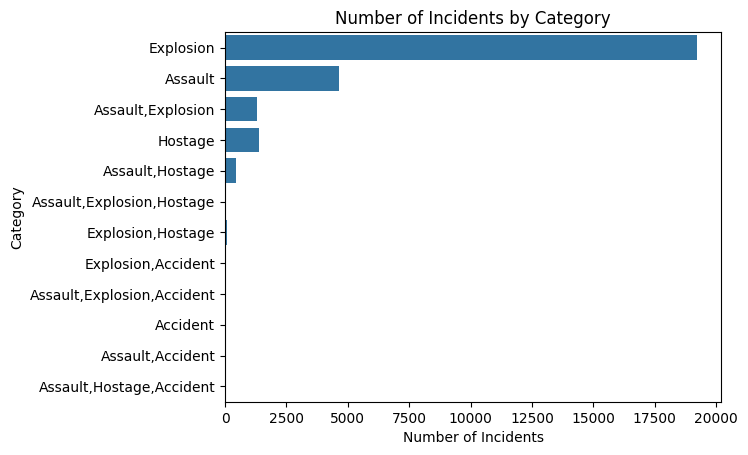

In [55]:
sns.countplot(df['CATEGORY'])
plt.title("Number of Incidents by Category")
plt.xlabel("Number of Incidents")
plt.ylabel("Category")
plt.show()


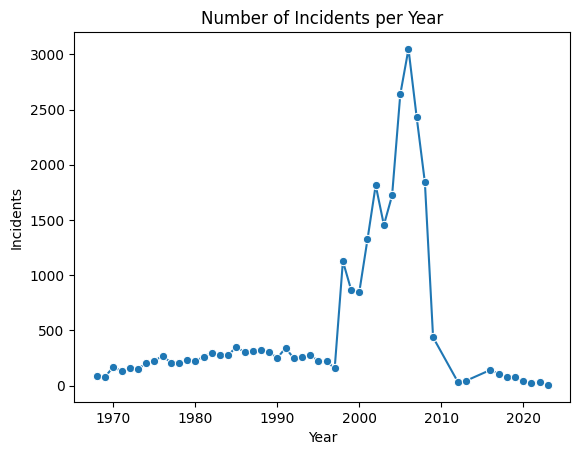

In [61]:
incident_year = df['YEAR'].value_counts().sort_index()
sns.lineplot(x=incident_year.index, y=incident_year.values, marker='o')
plt.title("Number of Incidents per Year")
plt.xlabel("Year")
plt.ylabel("Incidents")
plt.show()


The number of attacks shows clear fluctuations across decades. In some periods, there is a sharp increase (e.g., conflicts or wars), while in recent years there might be signs of decline in some regions. Most incidents occured in 2000 to 2010.

In [64]:
# deadliest attack
deadliest_attack = df[['DATE','COUNTRY','CITY','PERPETRATOR','DEAD','DESCRIPTION']].sort_values(by='DEAD', ascending=False).head(10)
deadliest_attack

,DATE,COUNTRY,CITY,PERPETRATOR,DEAD,DESCRIPTION
16452,2001-09-11,United States,New York City,Al Qaeda,2749.0,Hijacked American Airlines Flight 11 from Bost...
5015,2007-02-03,Iraq,Baghdad,Taliban,2006.0,A dump truck full of explosives detonated in a...
1285,2008-11-03,Indonesia,Ternate,Taliban,2002.0,"On Nov 3, 2008 a small petroleum bombs explode..."
22444,1988-12-05,Peru,Baghdad,Shining Path (SL),1695.0,Approximately 40 members of Sendero Luminoso t...
263,2017-10-14,Somalia,Mogadishu,Al Shabaab,587.0,A heavy blast caused by a truck VBIED bombing ...
25668,1977-03-27,Spain,Baghdad,MPAIAC,583.0,A small bomb is detonated at the Gran Canaria ...
26649,1972-05-31,Italy,Savogna d'Isonzo,Ordine Nuovo,500.0,A group of Carabinieri fell into an ambush in ...
3645,2007-08-14,Iraq,Sinjar,Taliban,500.0,Four truck bombs hit a poor rural area near th...
528,2013-05-15,Iraq,Baghdad,Islamic State,449.0,May 2013 Iraq attacks: A series of deadly bomb...
22855,1987-09-07,France,Paris,Hezbollah,404.0,A bomb went off in front of the Paris branch o...


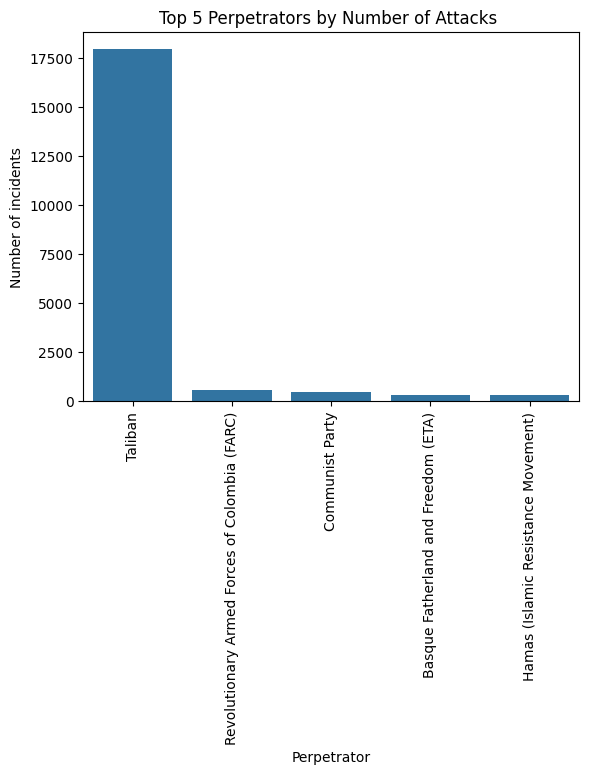

In [73]:
perpetrator = df['PERPETRATOR'].value_counts().head(5)
sns.barplot(x=perpetrator.index, y=perpetrator.values)
plt.title("Top 5 Perpetrators by Number of Attacks ")
plt.ylabel("Number of incidents")
plt.xticks(rotation=90)
plt.xlabel("Perpetrator")
plt.show()


A small number of groups (like Taliban, ISIS, Al-Qaeda) are responsible for a large portion of attacks. This indicates that counter-terrorism policies targeted at these groups could have an outsized impact.

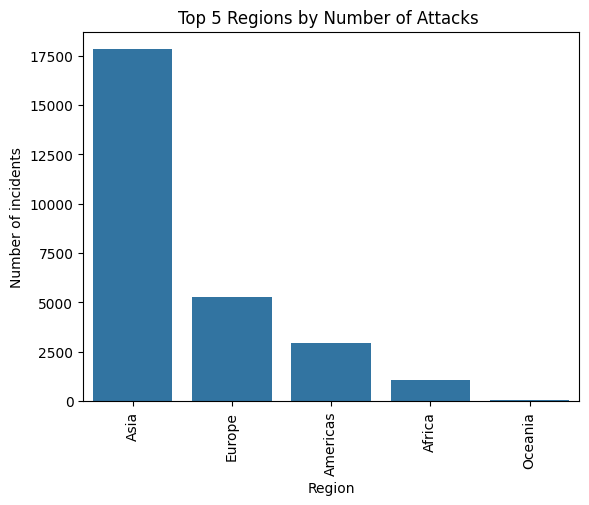

In [74]:
region = df['REGION'].value_counts().head(5)
sns.barplot(x=region.index, y=region.values)
plt.title("Top 5 Regions by Number of Attacks ")
plt.ylabel("Number of incidents")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.show()

Asia and the Europe have the highest number of terrorist incidents, while regions like Africa and America show far fewer events. This highlights strong geographical concentration.

In [80]:
df['CASUALTIES'] = df['DEAD'] + df['INJURED']
df.head()

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,CATEGORY,YEAR,CASUALITIES,CASUALTIES
0,2023-04-02,Russia,Baghdad Governorate,Saint Petersburg,Eastern Europe,Europe,Darya Trepova,42.0,1.0,During a speech by military blogger Vladlen Ta...,Explosion,2023,43.0,43.0
1,2023-03-06,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"A terrorist attack occurred in Bolan, Balochis...",Explosion,2023,22.0,22.0
2,2023-02-17,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,The 2023 Karachi Police Station Attack occurre...,Assault,2023,21.0,21.0
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Southern Asia,Asia,Jamaat-ul-Ahrar,220.0,101.0,A suicide attacker detonated a bomb during aft...,Explosion,2023,321.0,321.0
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Palestinian Islamic Jihad (PIJ),3.0,7.0,Seven people were shot and killed and at least...,Assault,2023,10.0,10.0


/tmp/ipython-input-1409330564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casualties_country.values, y=casualties_country.index, palette="Reds")


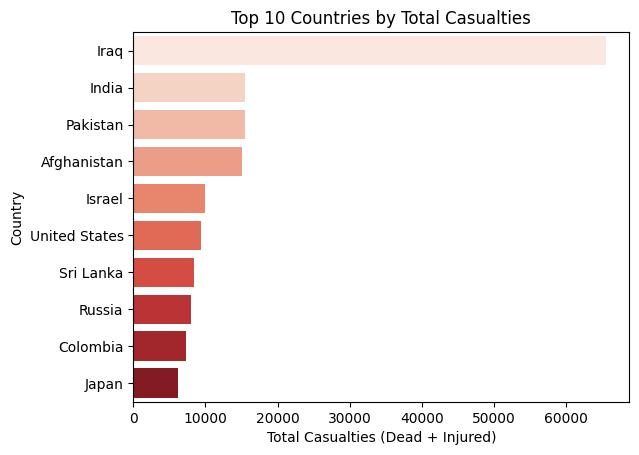

In [81]:
casualties_country = df.groupby('COUNTRY')['CASUALTIES'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=casualties_country.values, y=casualties_country.index, palette="Reds")
plt.title("Top 10 Countries by Total Casualties")
plt.xlabel("Total Casualties (Dead + Injured)")
plt.ylabel("Country")
plt.show()


Countries like Iraq, Pakistan, and Afghanistan not only face the most incidents but also the highest human cost in terms of casualties

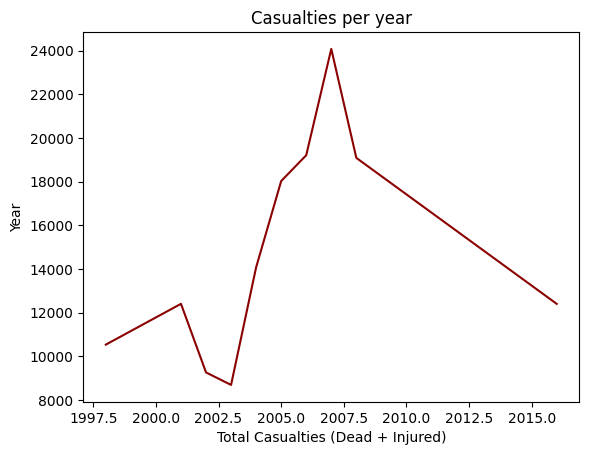

In [85]:
casualties_year = df.groupby('YEAR')['CASUALTIES'].sum().sort_values(ascending=False).head(10)

sns.lineplot(y=casualties_year.values, x=casualties_year.index,color='darkred')
plt.title("Casualties per year")
plt.xlabel("Total Casualties (Dead + Injured)")
plt.ylabel("Year")
plt.show()


Casualties spike in certain conflict periods like 2005 - 2010, showing that terrorism intensity is strongly linked to ongoing wars and regional instability.

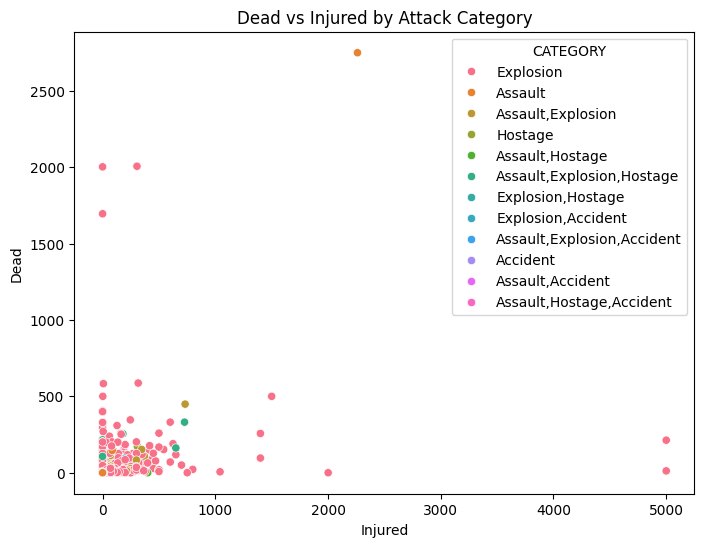

In [86]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x="INJURED", y="DEAD", hue="CATEGORY")
plt.title("Dead vs Injured by Attack Category")
plt.xlabel("Injured")
plt.ylabel("Dead")
plt.show()


Most attacks result in more injuries than deaths. However, some categories (like suicide bombings) show a higher ratio of deaths to injuries, making them particularly lethal.

Pakistan, Iraq, and Afghanistan emerge as the most affected countries, both in terms of incidents and casualties.

Explosions are the deadliest category of attack, followed by armed assaults, while hostage and accidental incidents are less common.

Over time, the number of incidents and casualties has shown clear spikes during conflict-heavy years, suggesting a strong link between terrorism and political instability.

A few groups are responsible for a disproportionately large number of attacks, which indicates that targeting these actors could significantly reduce the impact of terrorism.